In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# HEALTH INSURANCE DATASET

In [39]:
df=pd.read_csv(r"C:\Users\Sakshi\Downloads\healthinsurance.csv")
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,heart rate,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [40]:
print("\033[1mROWS AND COLUMNS : \033[0m",df.shape)

ROWS AND COLUMNS :  (15000, 13)


# EXPLORATORY DATA ANALYSIS

In [41]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,heart rate,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [42]:
print("\033[1mDATATYPES OF ALL COLUMNS : \033[0m")
print(df.info())

DATATYPES OF ALL COLUMNS : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   heart rate           15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB
None


In [43]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'heart rate', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [44]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\033[1mVALUE COUNTS FOR '{col}':\033[0m")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

VALUE COUNTS FOR 'sex':
sex
female    7652
male      7348
Name: count, dtype: int64

----------------------------------------

VALUE COUNTS FOR 'hereditary_diseases':
hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

----------------------------------------

VALUE COUNTS FOR 'city':
city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64

----------------------------------------

VALUE COUNTS FOR 'job_title':
job_title
Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper        

# DATA VISUALIZATION

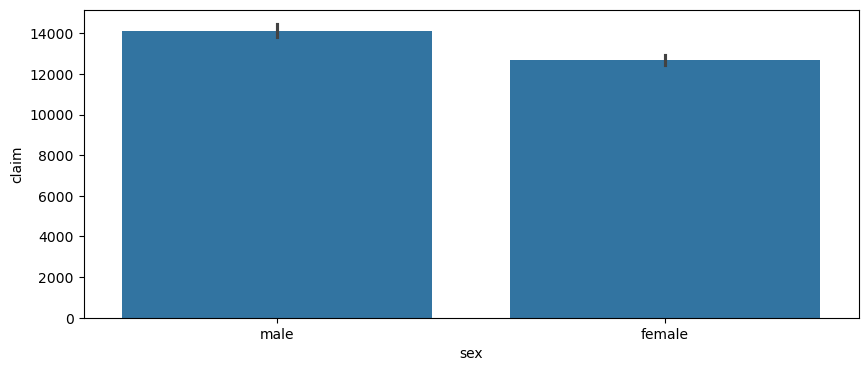

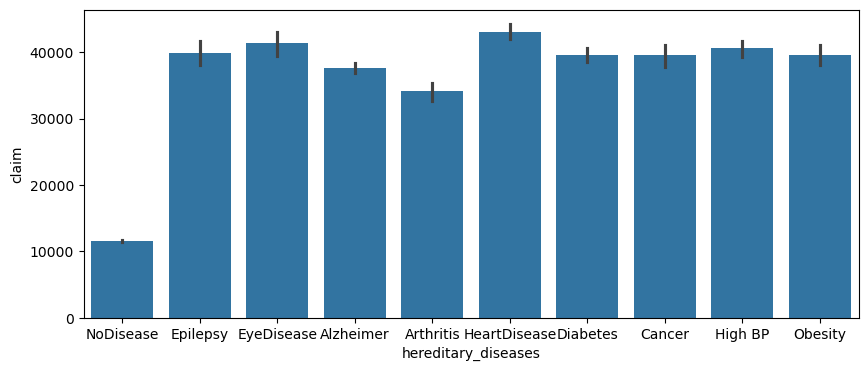

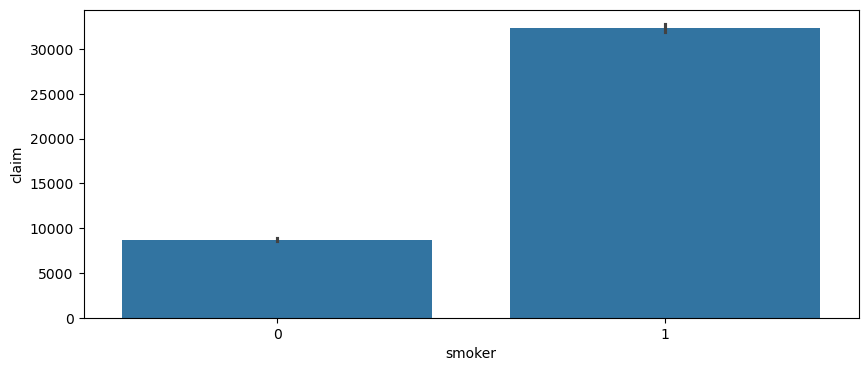

In [45]:
cols=['sex','hereditary_diseases', 'smoker']
for i in cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df, x=i, y='claim')
    plt.show

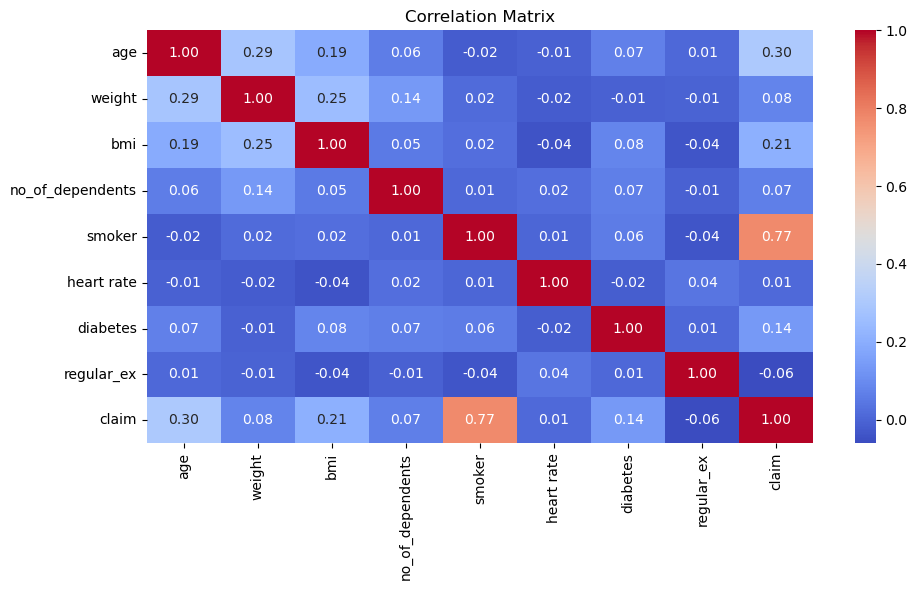

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

age vs CLAIM


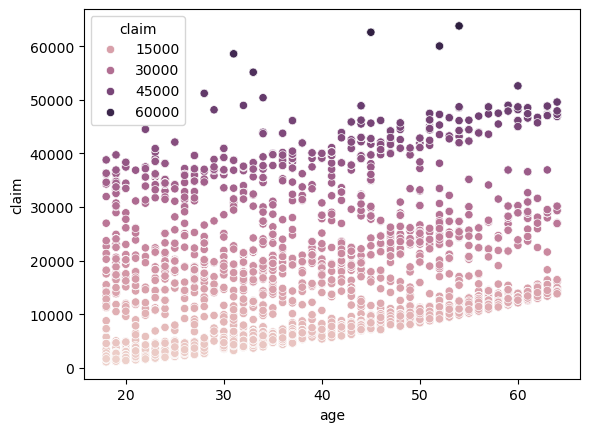

bmi vs CLAIM


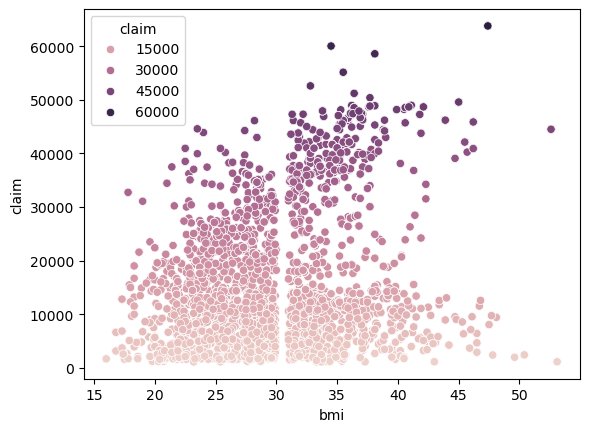

In [47]:
cols=['age','bmi']
for i in cols:
    sns.scatterplot(data=df,x=i,y='claim',hue='claim')
    print(i ,"vs",'CLAIM')
    plt.show()

# DATA PREPROCESSING

# 1. DUPLICATES

In [48]:
print("\033[1mDATASET SHAPE BEFORE DROPPING DUPLICATES : \033[0m",df.shape)

DATASET SHAPE BEFORE DROPPING DUPLICATES :  (15000, 13)


In [49]:
print("\033[1mNUMBER OF DUPLICATE VALUES : \033[0m",df.duplicated().sum())

NUMBER OF DUPLICATE VALUES :  1096


In [50]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [51]:
print("\033[1mDATASET SHAPE AFTER DROPPING DUPLICATES : \033[0m",df.shape)

DATASET SHAPE AFTER DROPPING DUPLICATES :  (13904, 13)


# 2. NULL VALUES

In [52]:
print("\033[1mNUMBER OF NULL VALUES IN THE DATASET\033[0m")
print(df.isnull().sum())

NUMBER OF NULL VALUES IN THE DATASET
age                    361
sex                      0
weight                   0
bmi                    901
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
heart rate               0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


In [53]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [54]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [55]:
print("\033[1mNUMBER OF NULL VALUES AFTER FIXING \033[0m")
print(df.isnull().sum())

NUMBER OF NULL VALUES AFTER FIXING 
age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
heart rate             0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64


# DATA MAPPING

In [56]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,heart rate,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0


#                                                  LINEAR REGRESSION

# 1. FEATURE SPLITTING

In [57]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [58]:
x.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,heart rate,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor
1,49.0,0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer


In [59]:
y.head(2)

0    13112.6
1     9567.0
Name: claim, dtype: float64

# 2. DATA SPLITTING 

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("TRAINING DATASET OF INDEPENDENT VARIABLES : ",x_train.shape)
print("TESTING DATASET OF INDEPENDENT VARIABLES : ",x_test.shape)
print("TRAINING DATASET OF DEPENDENT VARIABLE : ",y_train.shape)
print("TESTING DATASET OF DEPENDENT VARIABLE : ", y_test.shape)

TRAINING DATASET OF INDEPENDENT VARIABLES :  (11123, 12)
TESTING DATASET OF INDEPENDENT VARIABLES :  (2781, 12)
TRAINING DATASET OF DEPENDENT VARIABLE :  (11123,)
TESTING DATASET OF DEPENDENT VARIABLE :  (2781,)


# 3. ENCODING

In [61]:
categorical_cols = ['hereditary_diseases','city','job_title']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_cols)
    ],
    remainder='passthrough'
)


# 4. FIT THE PIPELINE

In [62]:
pipeline_lr = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', LinearRegression())
])

In [63]:
pipeline_lr

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', LinearRegression())])

# 5. LINEAR REGRESSION MODEL-TRAINING

In [64]:
pipeline_lr.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', LinearRegression())])

# 6.LINEAR REGRESSION MODEL-TESTING

In [65]:
y_pred_LR=pipeline_lr.predict(x_test)
y_pred_LR

array([14681.6875 , 13111.65625, 11182.53125, ..., 16847.15625,
       12787.6875 ,  9948.25   ])

# 7. EVALUATION METRICS OF LINEAR REGRESSION

In [66]:
mse = mean_squared_error(y_test,y_pred_LR)
mae = mean_absolute_error(y_test,y_pred_LR)
r2s = r2_score(y_test,y_pred_LR)

In [67]:
prediction=pd.DataFrame({'MEAN SQUARED ERROR':[mse], 'MEAN ABSOLUTE ERROR':[mae], 'R_SQUARED':[r2s]})

In [68]:
print("\033[1mPREDICTION FOR LINEAR REGRESSION\033[0m")
prediction

PREDICTION FOR LINEAR REGRESSION


,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR,R_SQUARED
0,3.555572e+07,3926.870925,0.762401


# 8. LINEAR REGRESSION MODEL - CROSS VALIDATION 

In [69]:
scores = cross_val_score(pipeline_lr, x, y, cv=5)
print("\033[1mMEAN CROSS VALIDATION ACCURACY USING LINEAR REGRESSION ALGORITHM:\033[0m", scores.mean())

MEAN CROSS VALIDATION ACCURACY USING LINEAR REGRESSION ALGORITHM: 0.76008811876803


# DECISION TREE REGRESSION

# 1. FIT THE PIPELINE

In [70]:
pipeline_dtr = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', DecisionTreeRegressor())
])    

In [71]:
pipeline_dtr

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', DecisionTreeRegressor())])

# 2. DECISION TREE REGRESSION MODEL-TRAINING

In [72]:
dtr=DecisionTreeRegressor()
pipeline_dtr.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', DecisionTreeRegressor())])

# 3. DECISION TREE REGRESSION MODEL-TESTING

In [73]:
y_pred_DTR=pipeline_dtr.predict(x_test)

# 4. EVALUATION METRICS OF DECISION TREE REGRESSION

In [74]:
mse_DTR = mean_squared_error(y_test,y_pred_DTR)
mae_DTR = mean_absolute_error(y_test,y_pred_DTR)
r2s_DTR = r2_score(y_test,y_pred_DTR)

In [75]:
prediction_DTR=pd.DataFrame({'MEAN SQUARED ERROR':[mse_DTR], 'MEAN ABSOLUTE ERROR':[mae_DTR], 'R_SQUARED':[r2s_DTR]})

In [76]:
print("\033[1mPREDICTION FOR DECISION TREE REGRESSION\033[0m")
prediction_DTR

PREDICTION FOR DECISION TREE REGRESSION


,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR,R_SQUARED
0,7.305358e+06,484.341424,0.951182


# 5. DECISION TREE REGRESSION MODEL - CROSS VALIDATION 

In [77]:
scores = cross_val_score(pipeline_dtr, x, y, cv=5)
print("\033[1mMEAN CROSS VALIDATION ACCURACY USING DECISION TREE REGRESSION ALGORITHM:\033[0m", scores.mean())

MEAN CROSS VALIDATION ACCURACY USING DECISION TREE REGRESSION ALGORITHM: 0.942252736140498


# RANDOM FOREST REGRESSION

# 1. FIT THE PIPELINE

In [78]:
pipeline_rfr = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', RandomForestRegressor())
])

In [79]:
pipeline_rfr

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', RandomForestRegressor())])

# 2. RANDOM FOREST REGRESSION MODEL-TRAINING

In [80]:
rfr=RandomForestRegressor()
pipeline_rfr.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['hereditary_diseases',
                                                   'city', 'job_title'])])),
                ('model', RandomForestRegressor())])

# 3.RANDOM FOREST REGRESSION MODEL-TESTING

In [81]:
y_pred_RFR=pipeline_rfr.predict(x_test)

In [82]:
mse_RFR = mean_squared_error(y_test,y_pred_RFR)
mae_RFR = mean_absolute_error(y_test,y_pred_RFR)
r2s_RFR = r2_score(y_test,y_pred_RFR)

In [83]:
prediction_RFR=pd.DataFrame({'MEAN SQUARED ERROR':[mse_RFR], 'MEAN ABSOLUTE ERROR':[mae_RFR], 'R_SQUARED':[r2s_RFR]})

In [84]:
print("\033[1mPREDICTION FOR RANDOM FOREST REGRESSION\033[0m")
prediction_RFR

PREDICTION FOR RANDOM FOREST REGRESSION


,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR,R_SQUARED
0,4.777644e+06,553.432005,0.968074


# 5. RANDOM FOREST REGRESSION MODEL - CROSS VALIDATION 

In [85]:
scores = cross_val_score(pipeline_rfr, x, y, cv=5)
print("\033[1mMEAN CROSS VALIDATION ACCURACY USING RANDOM FOREST REGRESSION ALGORITHM:\033[0m", scores.mean())

MEAN CROSS VALIDATION ACCURACY USING RANDOM FOREST REGRESSION ALGORITHM: 0.9604957154051265


In [ ]:
6. GRID-SEARCH CROSS VALIDATION

In [86]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
}
grid_search = GridSearchCV(estimator=pipeline_rfr, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
Best Score: 0.9565685896809084


In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20]
}

model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=pipeline_rfr, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='r2', random_state=42)
random_search.fit(x_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Params: {'model__n_estimators': 200, 'model__max_depth': 20}
Best Score: 0.9561825366419686
